In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/0133.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/043.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/083.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/089.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/023.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/092.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/0146.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/081.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/0202.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/0163.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/039.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/0152.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/025.png
/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test/0/0108.png


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-07-24 16:17:31.775071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753373851.983166      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753373852.039885      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Importing the dataset and normalize images

In [3]:
train_dir = '/kaggle/input/forest-fire-from-himawari8-satellite/Data/Train'
test_dir = '/kaggle/input/forest-fire-from-himawari8-satellite/Data/Test'

train_datagen = ImageDataGenerator(rescale=1./255)  
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 326 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Creating model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753373866.550174      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Compileing the model

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model training

In [6]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1753373882.815487      73 service.cc:148] XLA service 0x7ddf00006d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753373882.816323      73 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753373883.208739      73 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1:36 10s/step - accuracy: 0.5000 - loss: 0.6862

I0000 00:00:1753373885.879990      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.5703 - loss: 0.7818 - val_accuracy: 0.7125 - val_loss: 0.5328
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7819 - loss: 0.4612 - val_accuracy: 0.7750 - val_loss: 0.4967
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8973 - loss: 0.2623 - val_accuracy: 0.9000 - val_loss: 0.2102
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9713 - loss: 0.1609 - val_accuracy: 0.9000 - val_loss: 0.2336
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9439 - loss: 0.1480 - val_accuracy: 0.9750 - val_loss: 0.1072
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9790 - loss: 0.0707 - val_accuracy: 0.9000 - val_loss: 0.2427
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9735 - loss: 0.1241 - val_accuracy: 0.9500 - val_loss: 0.1359
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9859 - loss: 0.0441 - val_accuracy: 0.9750 - val_loss: 0.0989
Epo

Visualising the model performance

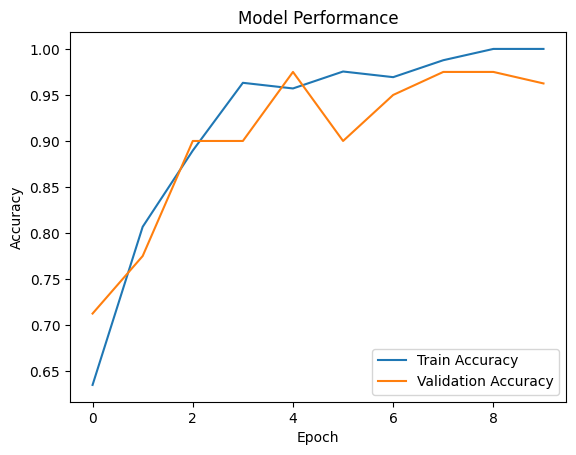

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Performance")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

If you want to make prediction, you can change img_path to your image path.

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/forest-fire-from-himawari8-satellite/Data/Train/0/061.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("There Is Fire" if prediction[0][0] > 0.5 else "There Is No Fire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
There Is Fire
